In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [66]:
stochastic_algos=['Causality','teamcs_Aleph','tripleahc','zhenhua','walktrap','Spin_glass']
greedy_algos=['csbioiitm-1','Fast_Greedy','luminex','nextmr']
kernel_algos=['spectral clustering','tuskdmi','bigs2','bluegenes','sim_net']
hierarchy_algos=['nextmr','tsuromi','Csbioiitm-2','bluegenes','tianle','sim_net']
local_algos=['label-propagation','sealangbrown']
#spin_algos='spin_glass'
"""stochastic_algos=['causality','team_cs','tripleahc','zhenhua','walktrap','spin_glass']
greedy_algos=['csbio_iitm','fast_greedy','luminex','nextmr']
kernel_algos=['spectral_clustering','tuskdmi','bigs2','blue_genes','sim_net']
hierarchy_algos=['nextmr','tsuromi_ono','csbio_hier','blue_genes','tianle','sim_net']
local_algos=['label_propagation','sealang_brown']"""
algo_map={'Causality':'MLRMCL','teamcs_Aleph':'Recursive_Infomap','tripleahc':'Recursive_Walktrap','zhenhua':'Walktrap_infomap','walktrap':'walktrap','Spin_glass':'spin_glass',
'csbioiitm-1':'louvain','Fast_Greedy':'fast_greedy','luminex':'multiplex-lovain','nextmr':'TOM_hier','spectral clustering':'spectral_clustering',
'tuskdmi':'DSD_kernel','bigs2':'Iterative_SC','bluegenes':'exp-laplacian_kernel','sim_net':'sc_agg',
'tsuromi':'dcut','Csbioiitm-2':'hamming_ensemble','tianle':'SVT','label-propagation':'label-propagation','sealangbrown':'shared_neighbor'}

#algorithms=['tripleahc','zhenhua','nextmr1','tuskdmi','tsuromi_ono','csbio_iitm','sealang_brown','tianle','big_s2','sim_net','spectral_clustering','walktrap','label_propagation','blue_genes']

In [67]:
titles=['Stochastic_methods','Greedy_methods','Kernel_methods','hierarchy_methods','local_methods']
methods=[stochastic_algos,greedy_algos,kernel_algos,hierarchy_algos,local_algos]

In [68]:
df_1=pd.read_excel('Social_benchmark_results/nmi_social.xlsx')
df_2=pd.read_excel('Social_benchmark_results/ccbar_social.xlsx')
df_3=pd.read_excel('Social_benchmark_results/time_social.xlsx')
df_4=pd.read_excel('Social_benchmark_results/modularity_social1.xlsx')

In [69]:
df_4.columns


Index(['datasets', 'tripleahc', 'zhenhua', 'nextmr', 'tuskdmi', 'tsuromi',
       'csbioiitm-1', 'sealangbrown', 'tianle', 'bigs2', 'teamcs_Aleph',
       'sim_net', 'luminex', 'spectral clustering', 'walktrap',
       'label-propagation', 'bluegenes', 'Causality', 'Fast_Greedy',
       'Spin_glass', 'Csbioiitm-2'],
      dtype='object')

In [70]:
def visualise(df,title,metric,methods,ax,order=[]):
    datasets=['adjnoun','dolphins','football','polbooks','polblogs','karate','email','cora']
    for i in range(len(methods)):
        ax.plot(range(8),df[methods[i]].iloc[order],'-o',label=algo_map[methods[i]])
    ax.set_xlabel('Datasets')
    xticks=[datasets[j] for j in order]
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(xticks,rotation=75)
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.legend()

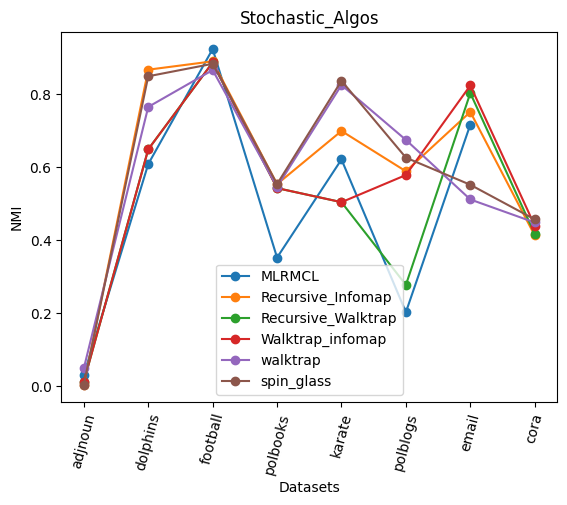

In [71]:
fig,axs=plt.subplots()
visualise(df_1,'Stochastic_Algos','NMI',stochastic_algos,axs,order=[0,1,2,3,5,4,6,7])

In [72]:
order1=[0,1,2,3,5,4,6,7]
order2=[0,1,2,3,4,6,7,5]
order3=[0,1,2,3,5,6,7,4]
order4=[1,5,0,2,3,7,4,6]
order5=[0,1,3,4,5,2,6,7]
orders=[order1,order2,order3,order4,order5]
df=[df_1,df_2,df_3,df_4]
metrics=['NMI','Cluster Ratio','time','modularity']

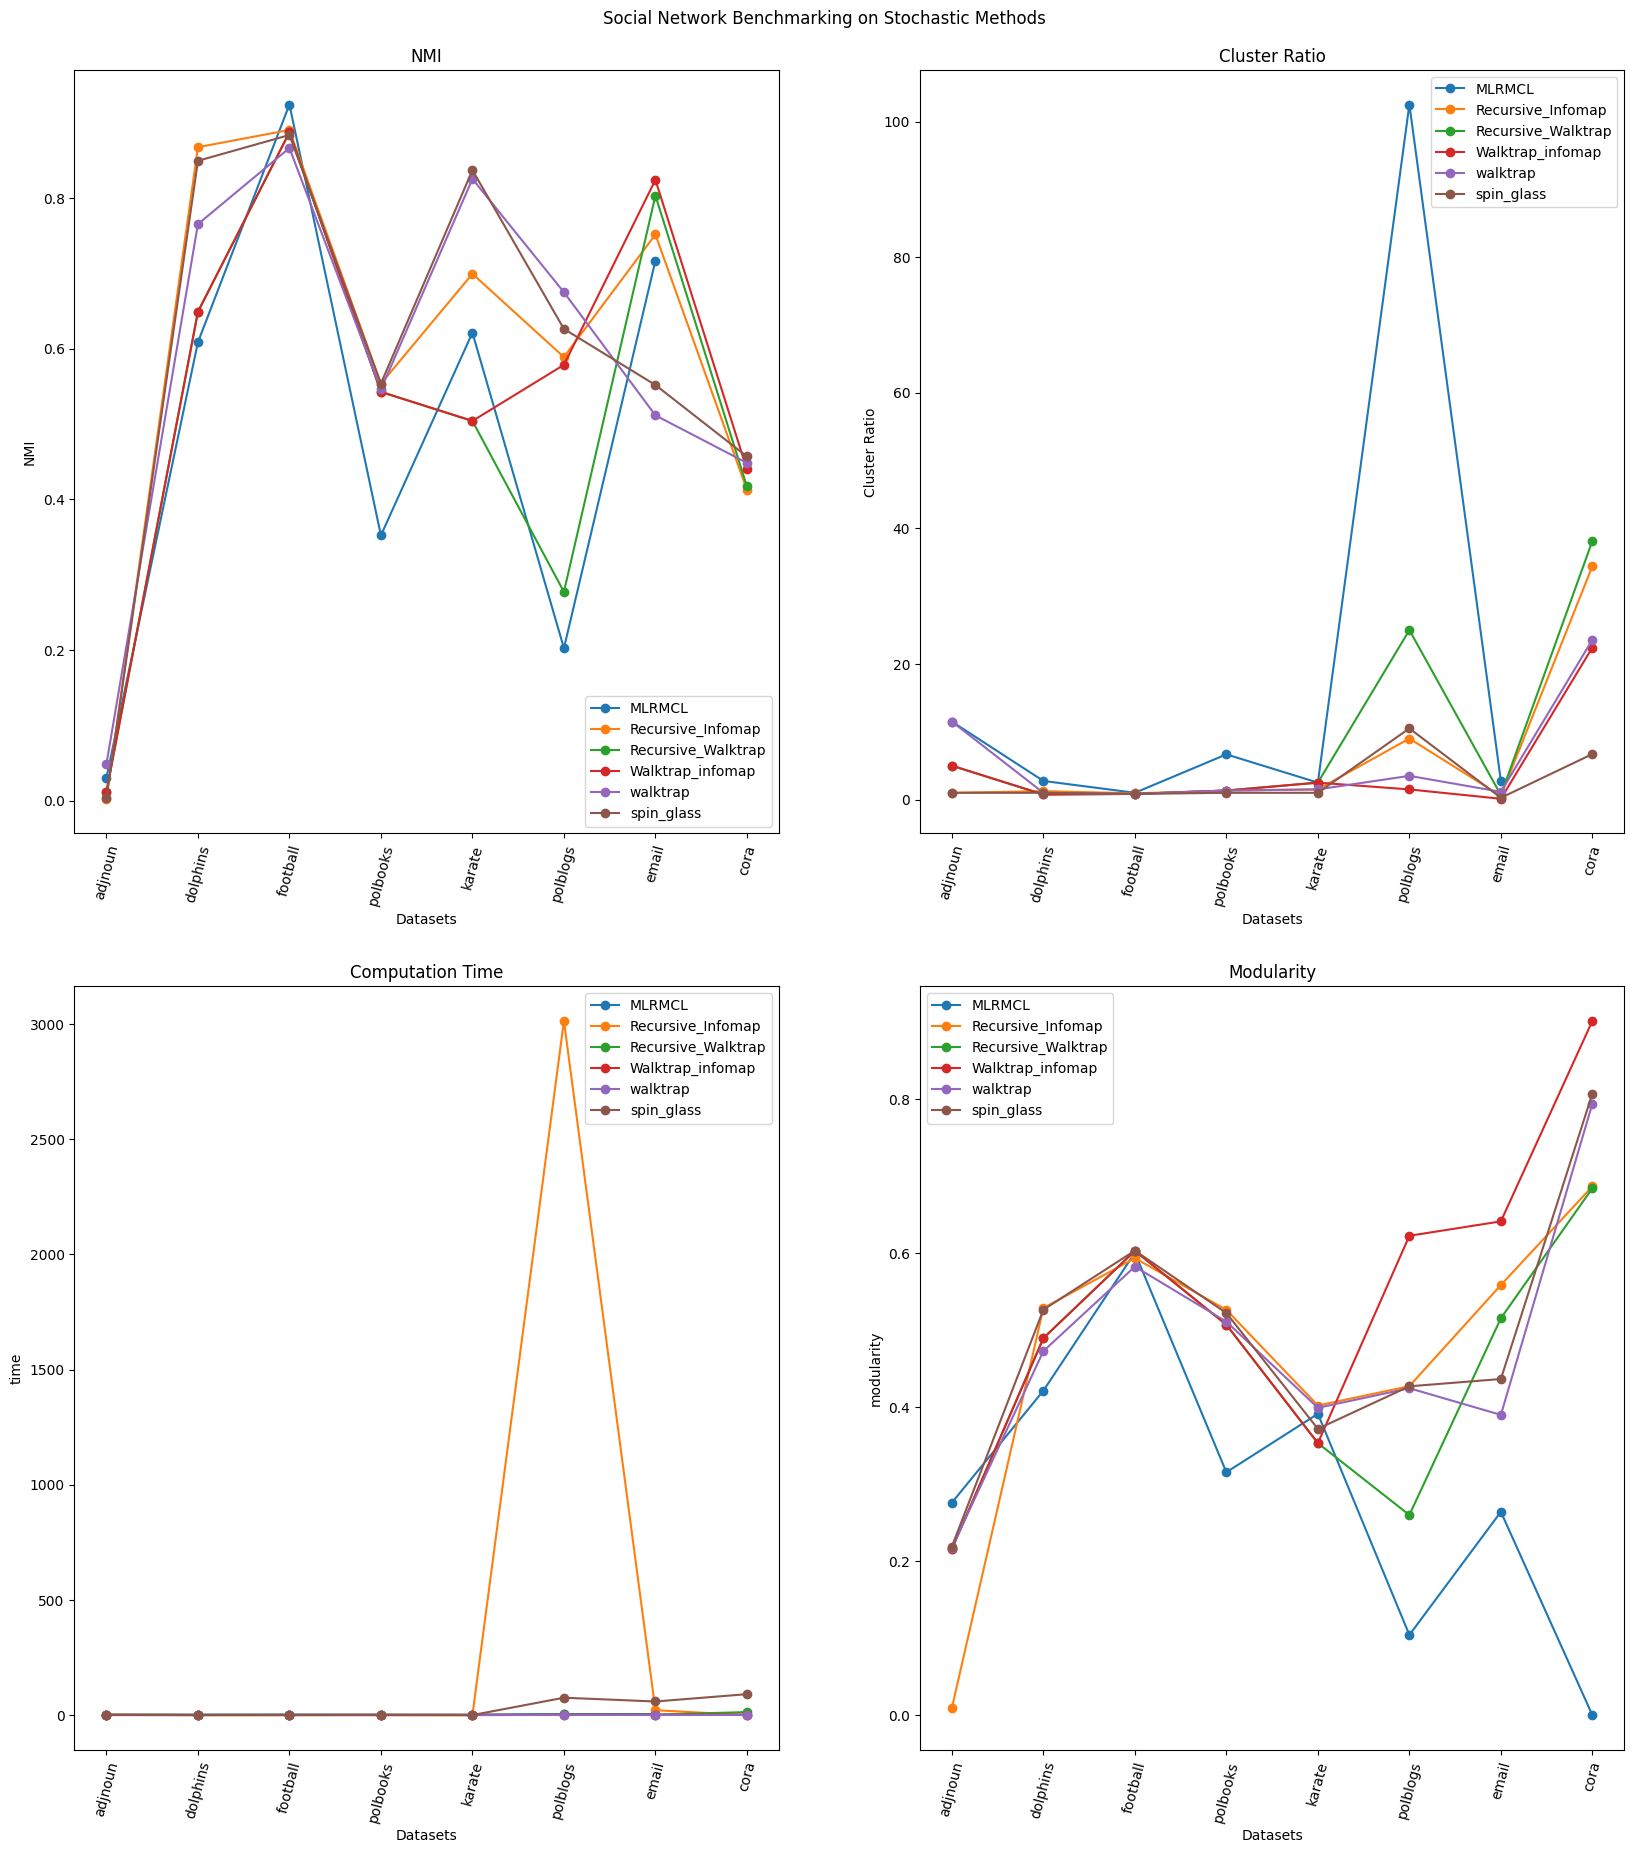

In [73]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
k=0
titles=['NMI','Cluster Ratio','Computation Time','Modularity']
plt.suptitle('Social Network Benchmarking on Stochastic Methods')
plt.subplots_adjust(top=0.95)
for i in range(2):
    for j in range(2):
        visualise(df[k],titles[k],metrics[k],stochastic_algos,axs[i][j],order=order1)
        k+=1

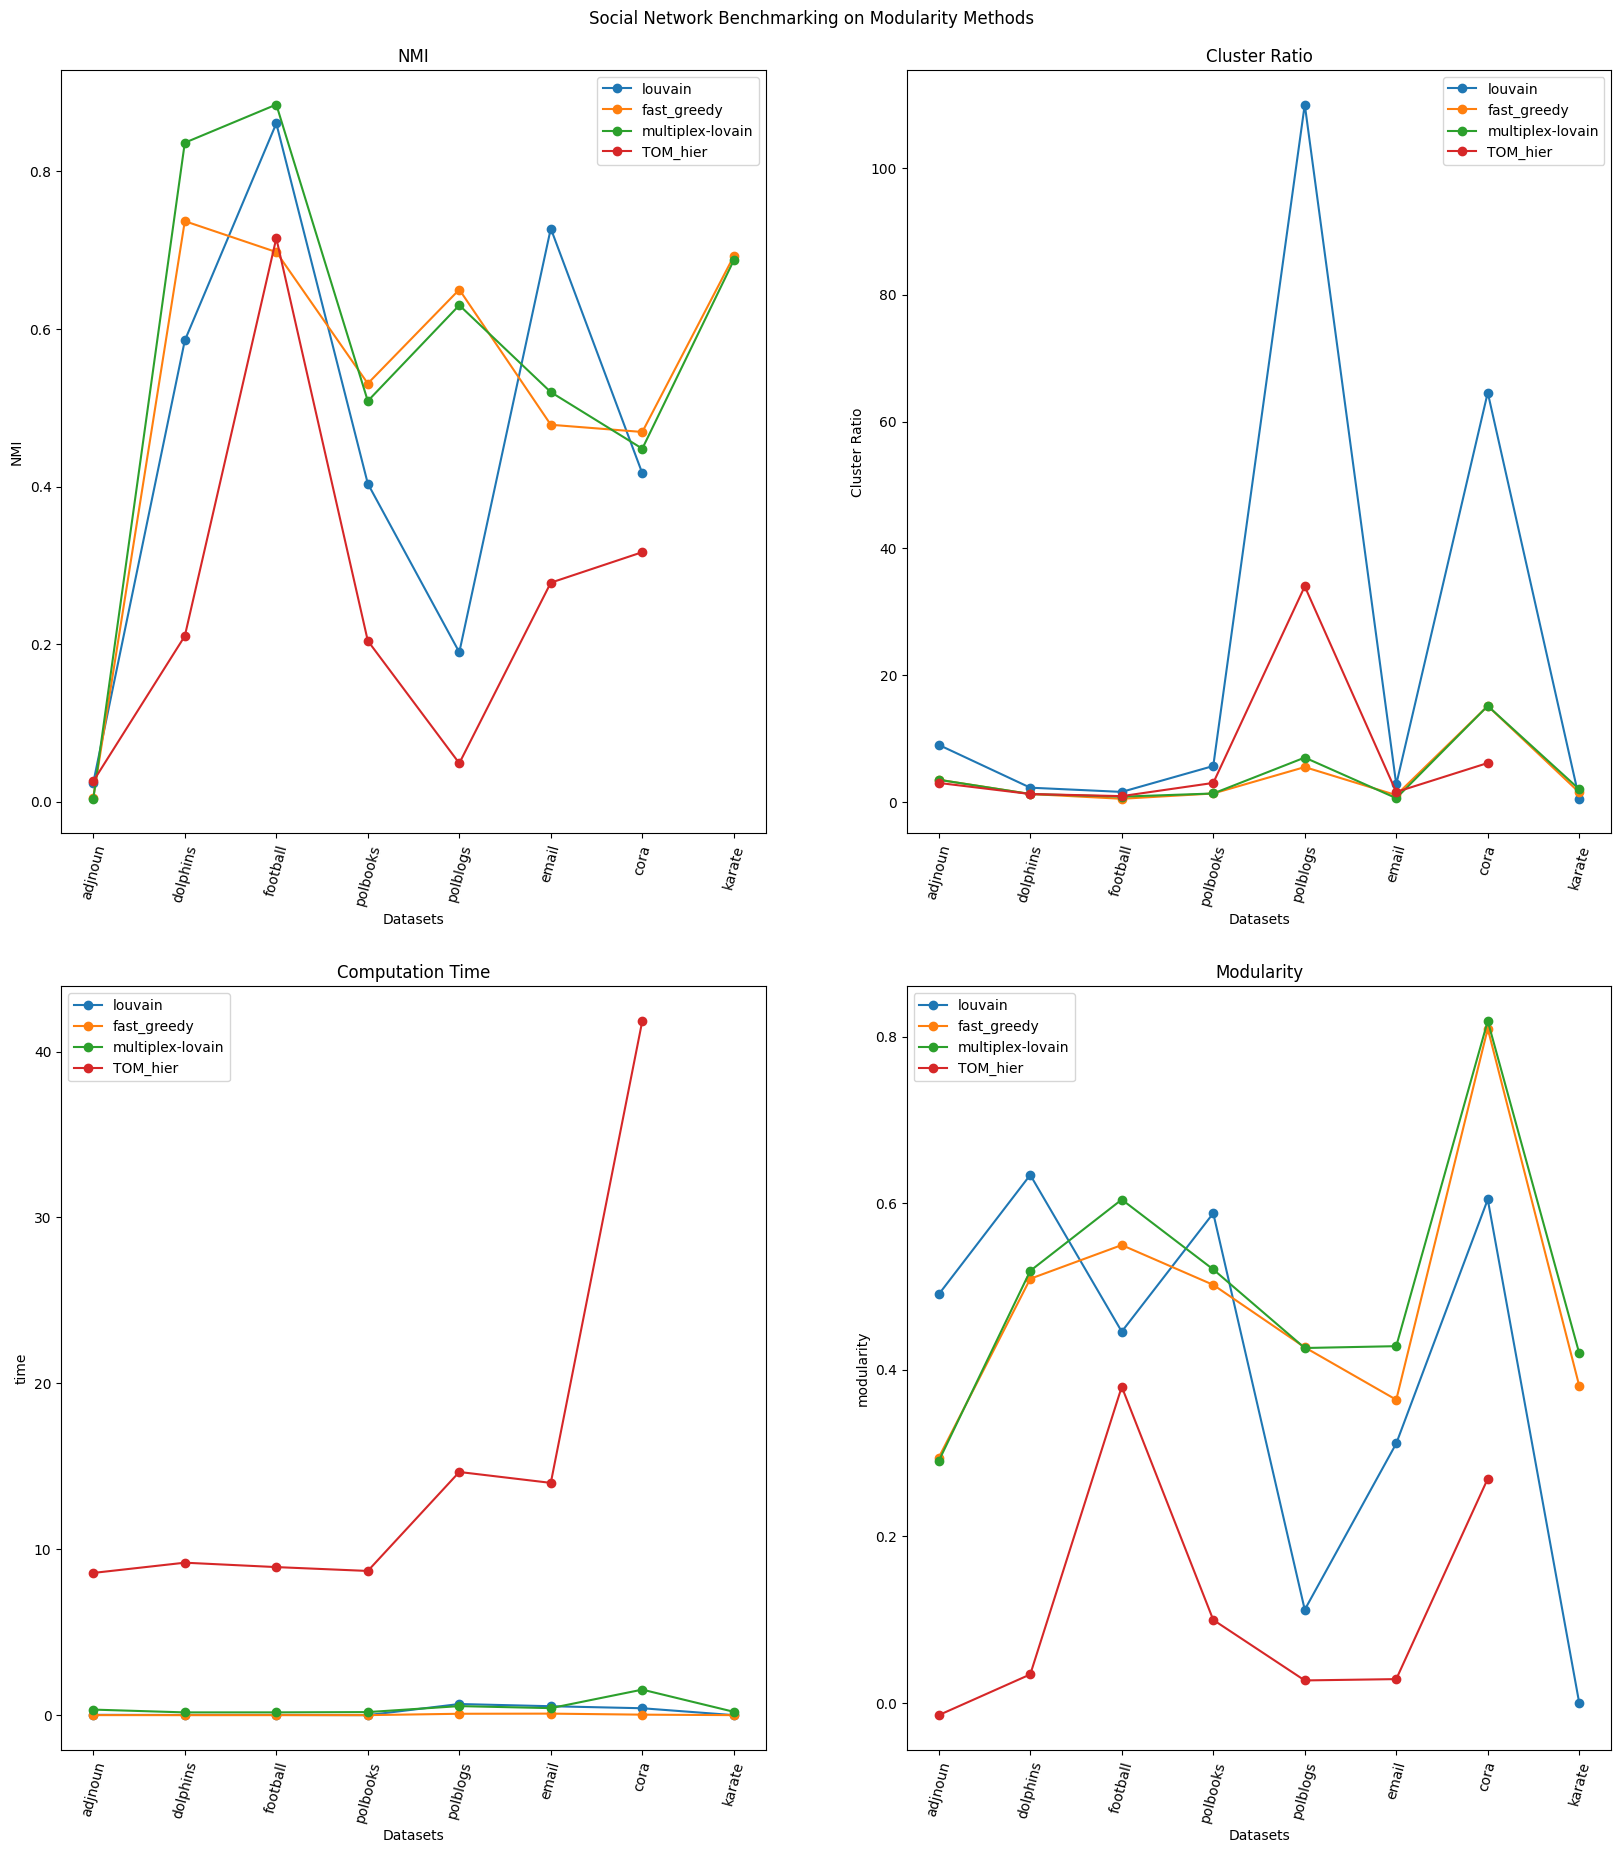

In [74]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
k=0
plt.suptitle('Social Network Benchmarking on Modularity Methods')
plt.subplots_adjust(top=0.95)
for i in range(2):
    for j in range(2):
        visualise(df[k],titles[k],metrics[k],greedy_algos,axs[i][j],order=order2)
        k+=1

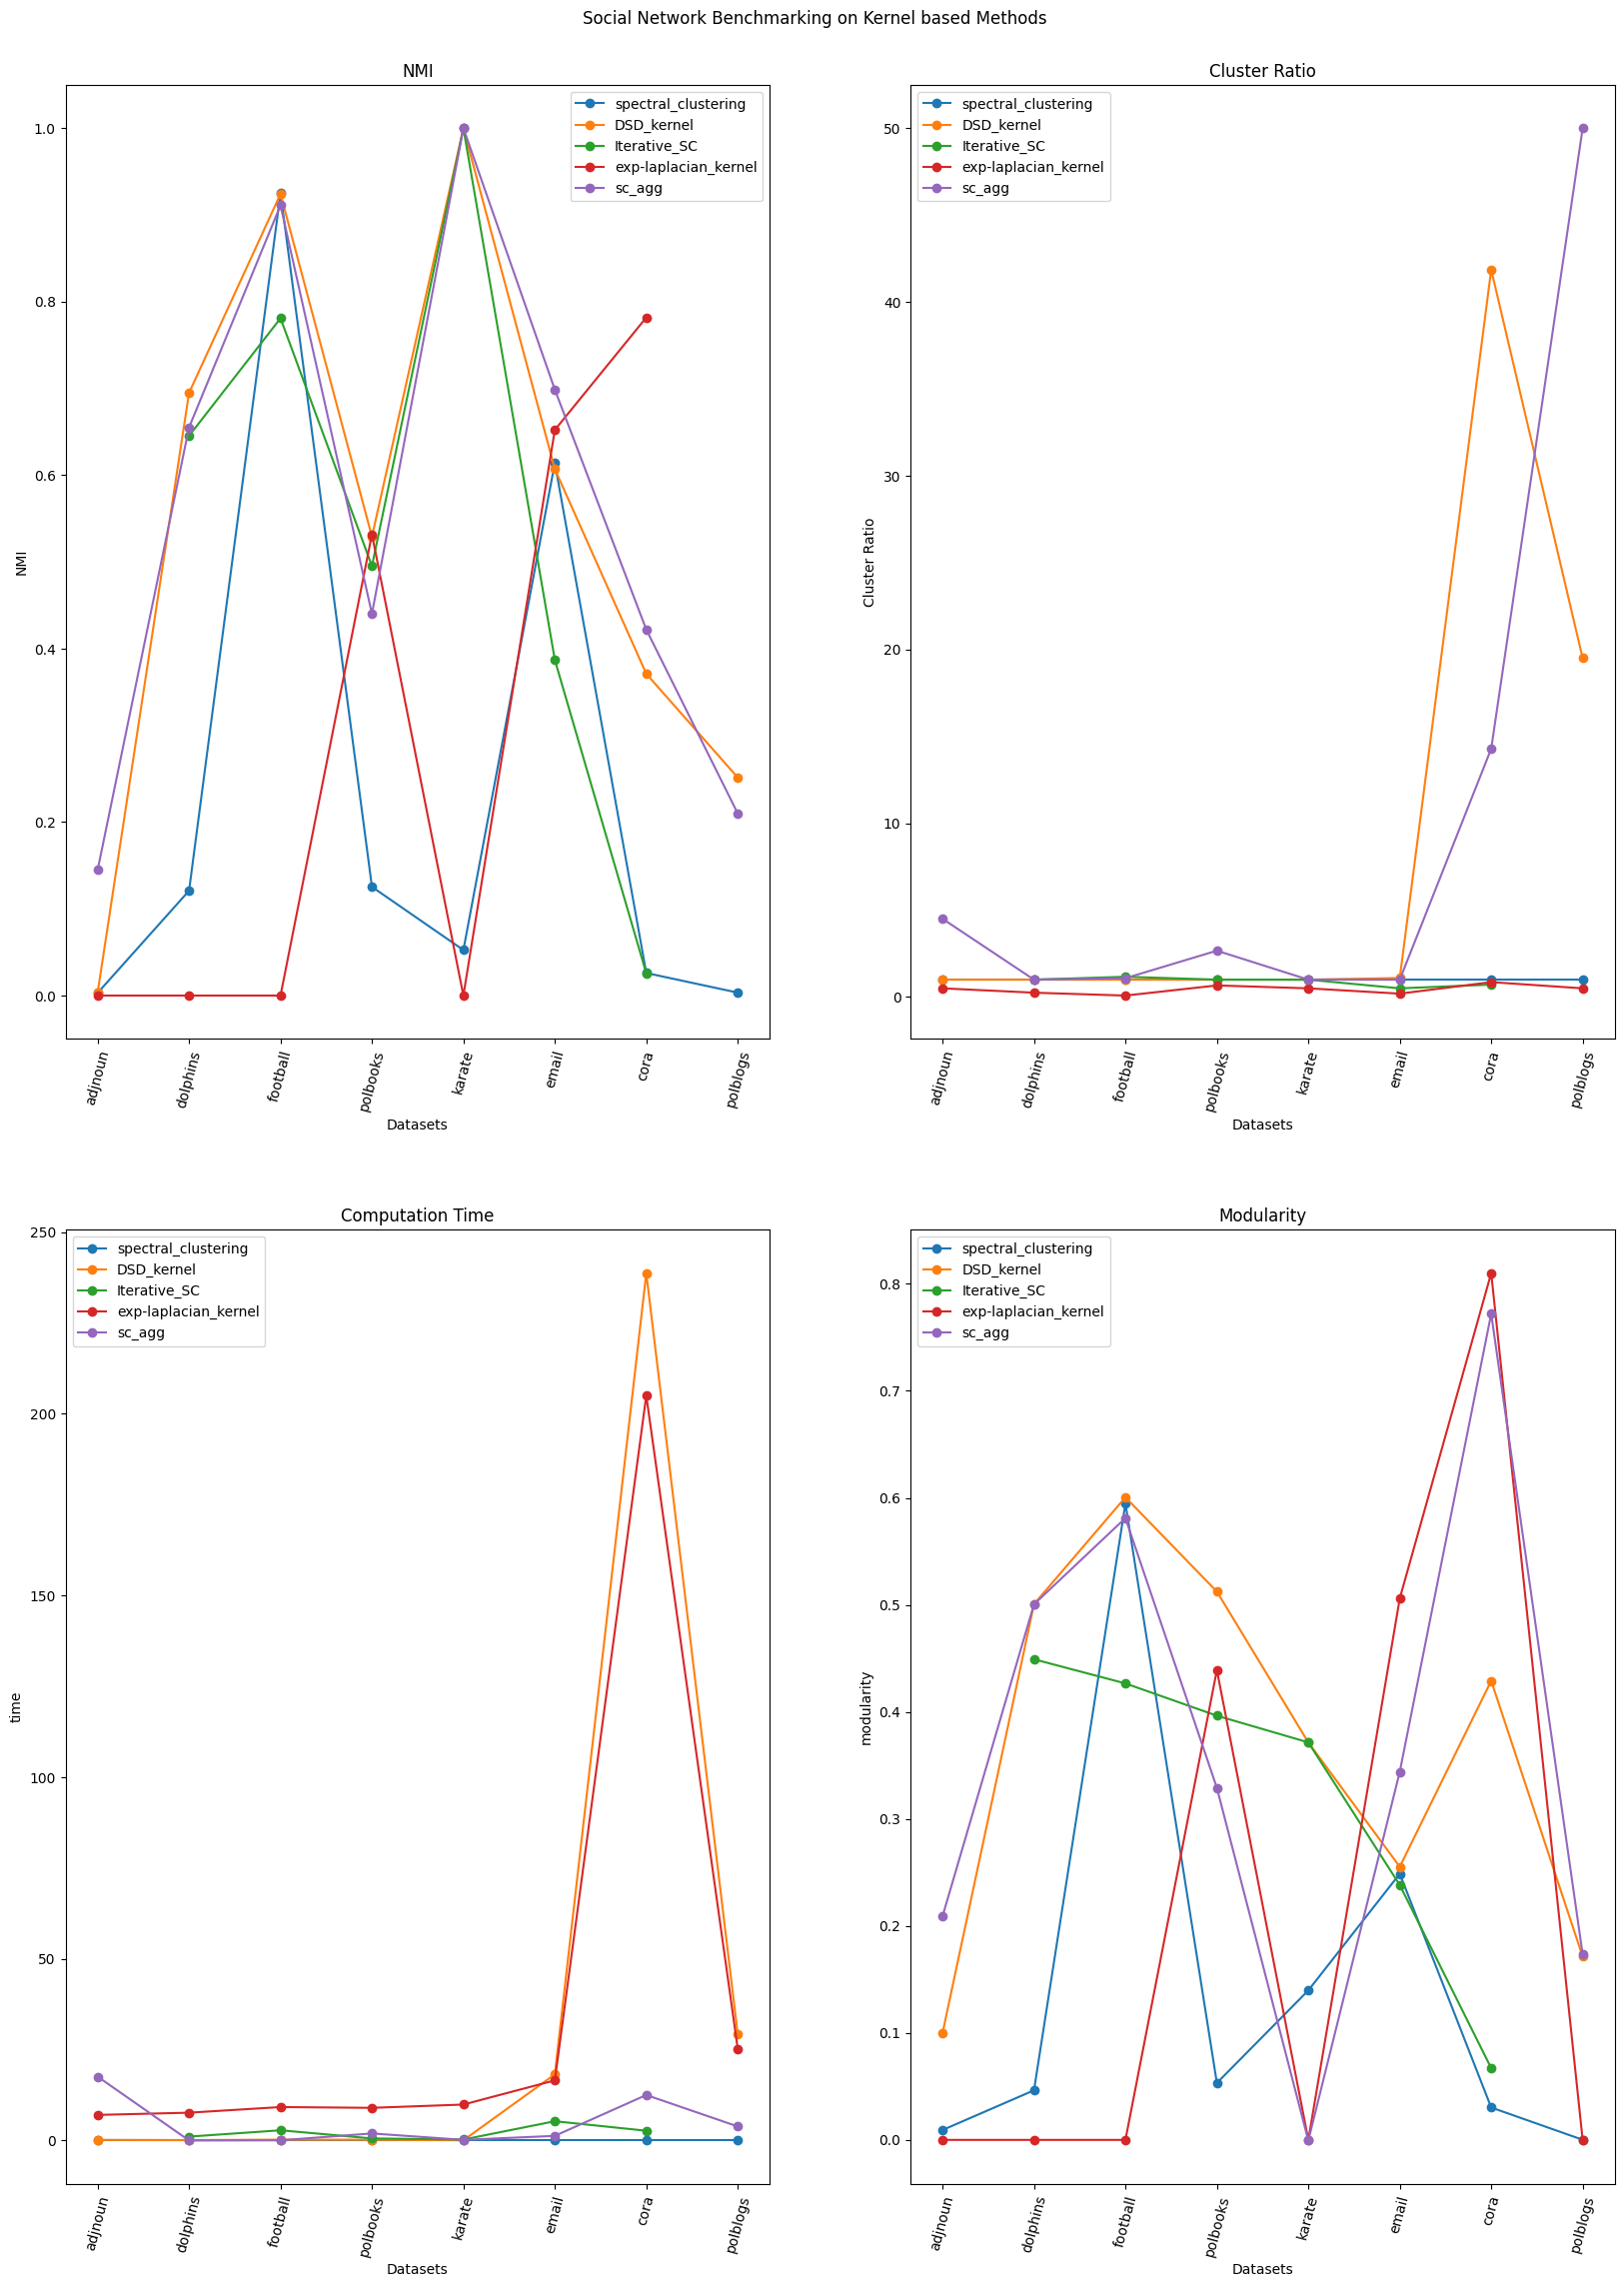

In [75]:
fig,axs=plt.subplots(2,2,figsize=(20,25))
k=0
plt.suptitle('Social Network Benchmarking on Kernel based Methods')
plt.subplots_adjust(top=0.95)  # Adjust this value to move the plots closer to the title

#plt.tight_layout()
for i in range(2):
    for j in range(2):
        visualise(df[k],titles[k],metrics[k],kernel_algos,axs[i][j],order=order3)
        k+=1

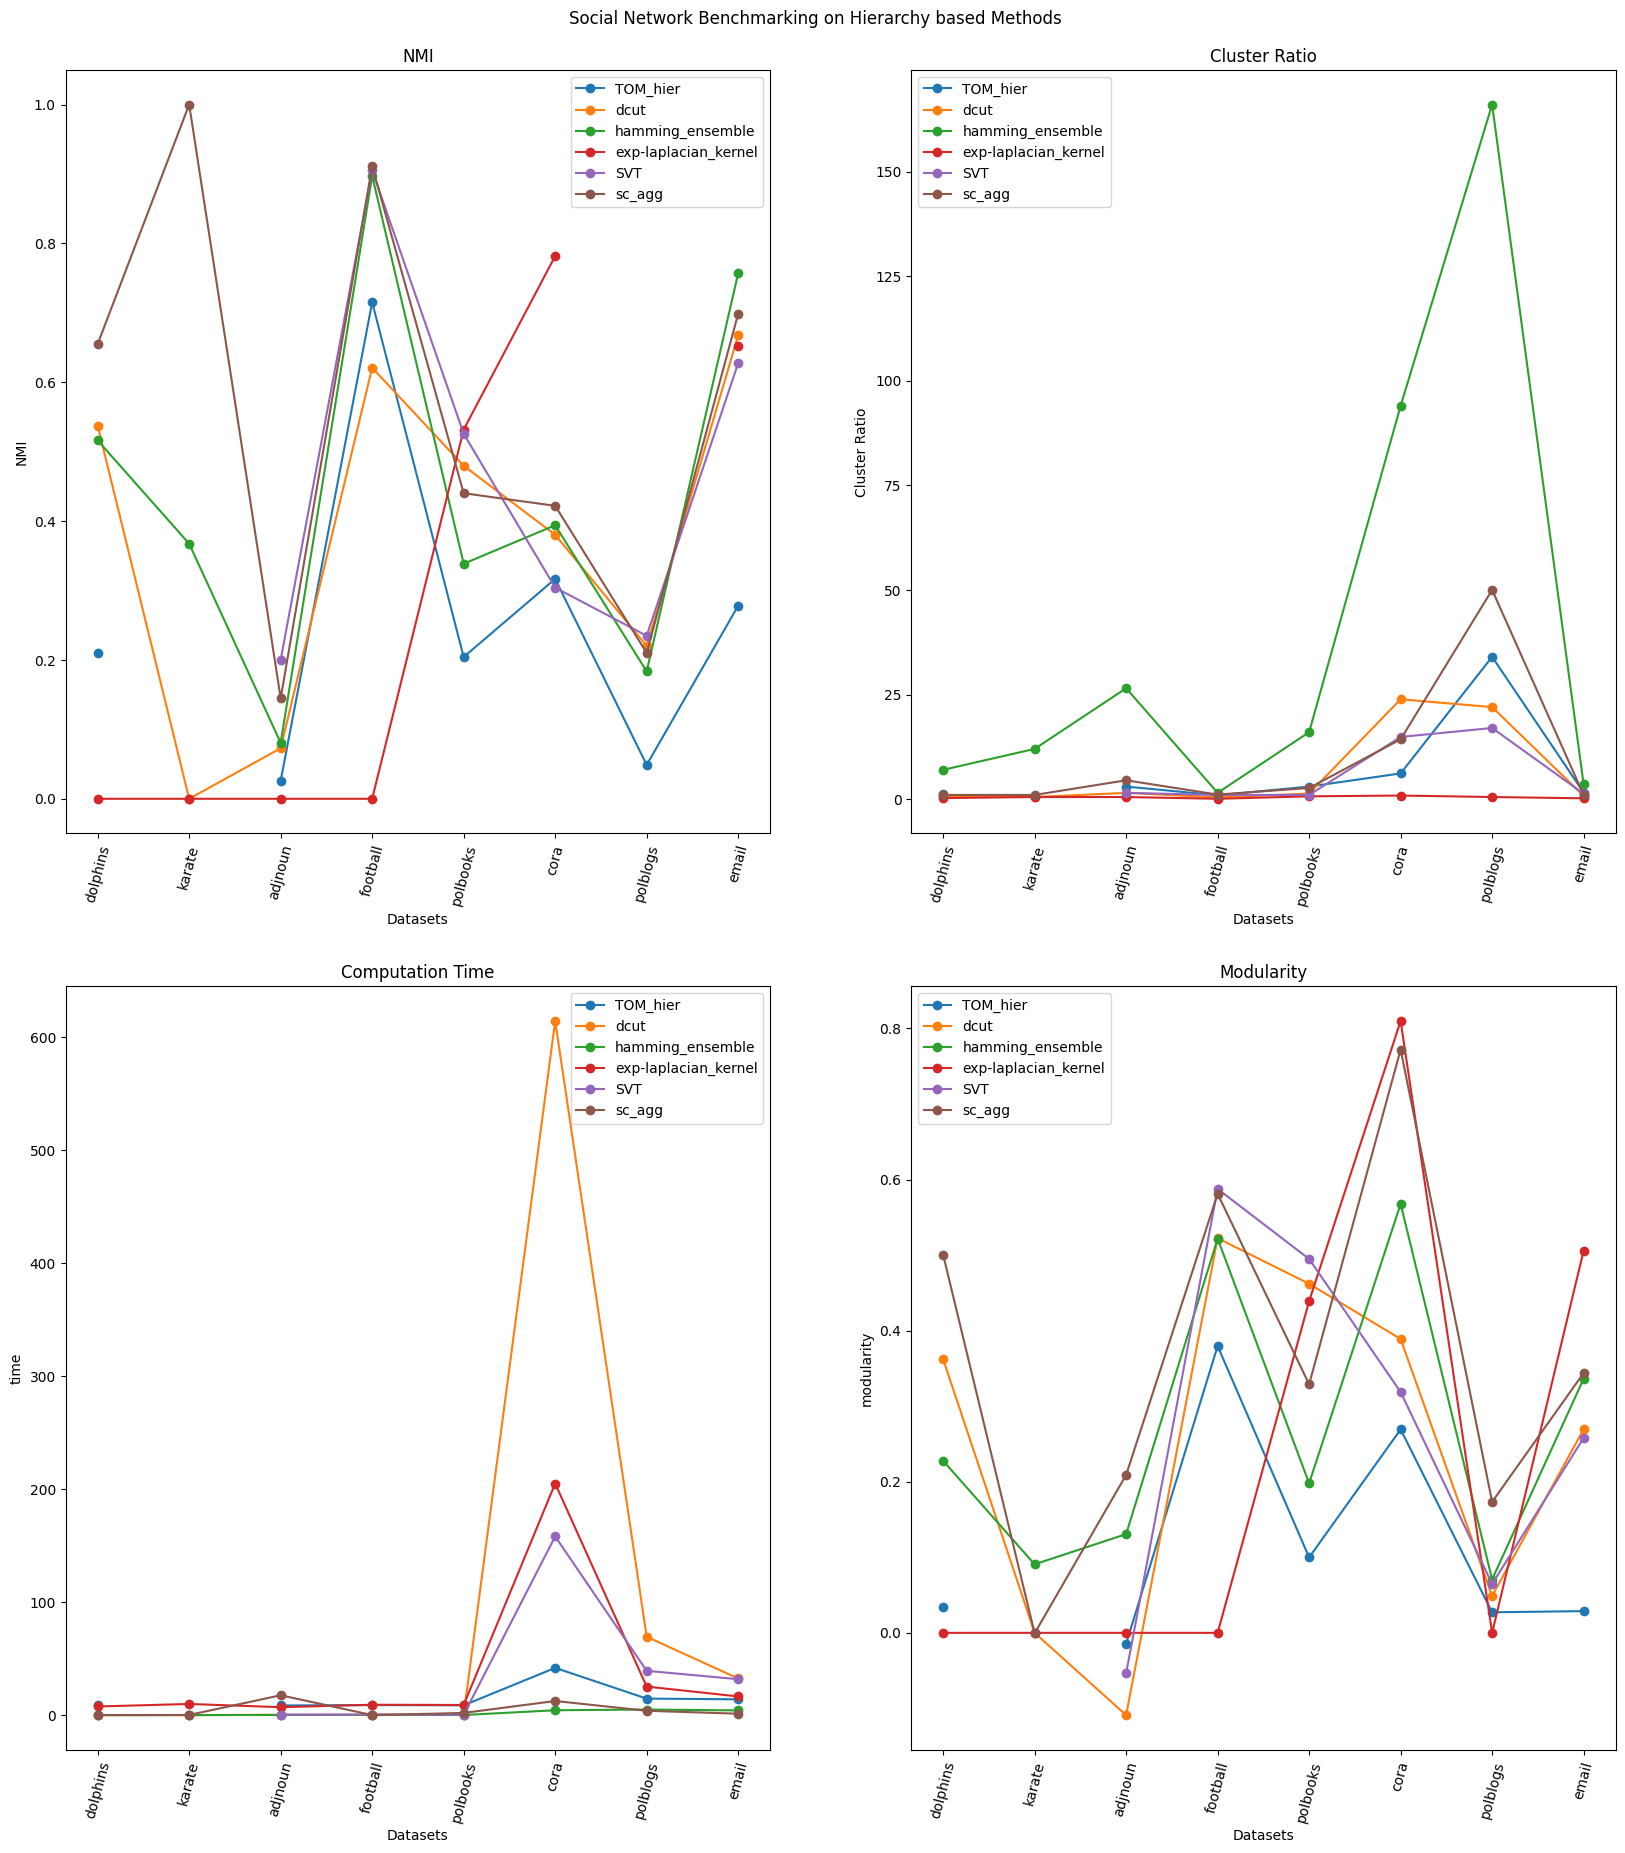

In [76]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
k=0
plt.suptitle('Social Network Benchmarking on Hierarchy based Methods')
plt.subplots_adjust(top=0.95)
for i in range(2):
    for j in range(2):
        visualise(df[k],titles[k],metrics[k],hierarchy_algos,axs[i][j],order=order4)
        k+=1

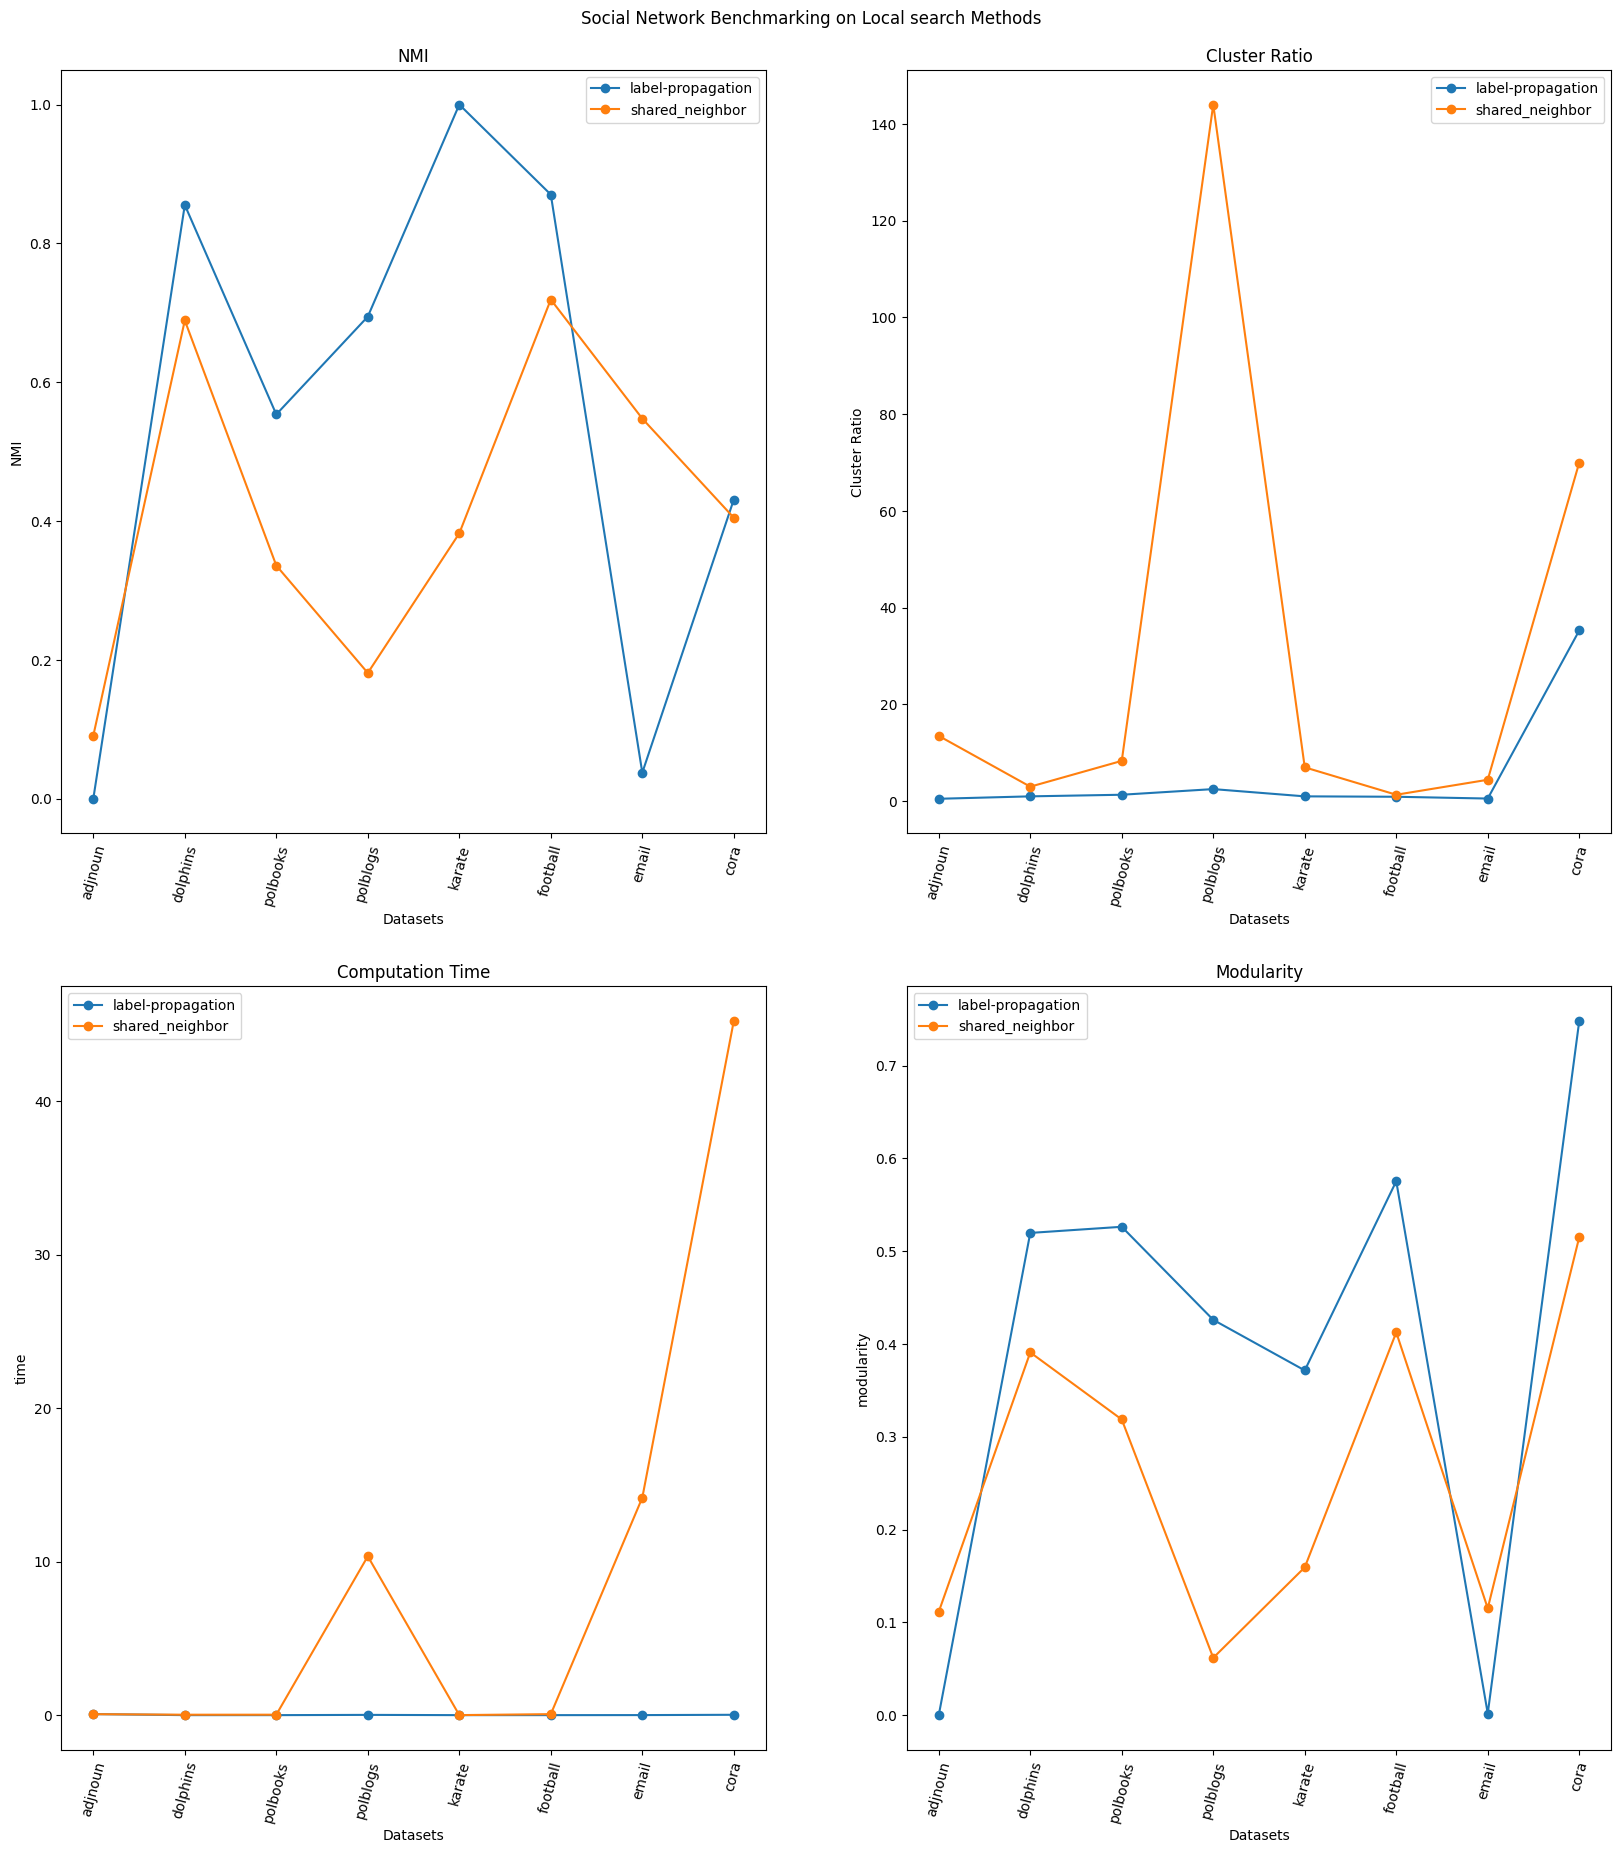

In [77]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
k=0
plt.suptitle('Social Network Benchmarking on Local search Methods')
plt.subplots_adjust(top=0.95)
for i in range(2):
    for j in range(2):
        visualise(df[k],titles[k],metrics[k],local_algos,axs[i][j],order=order5)
        k+=1

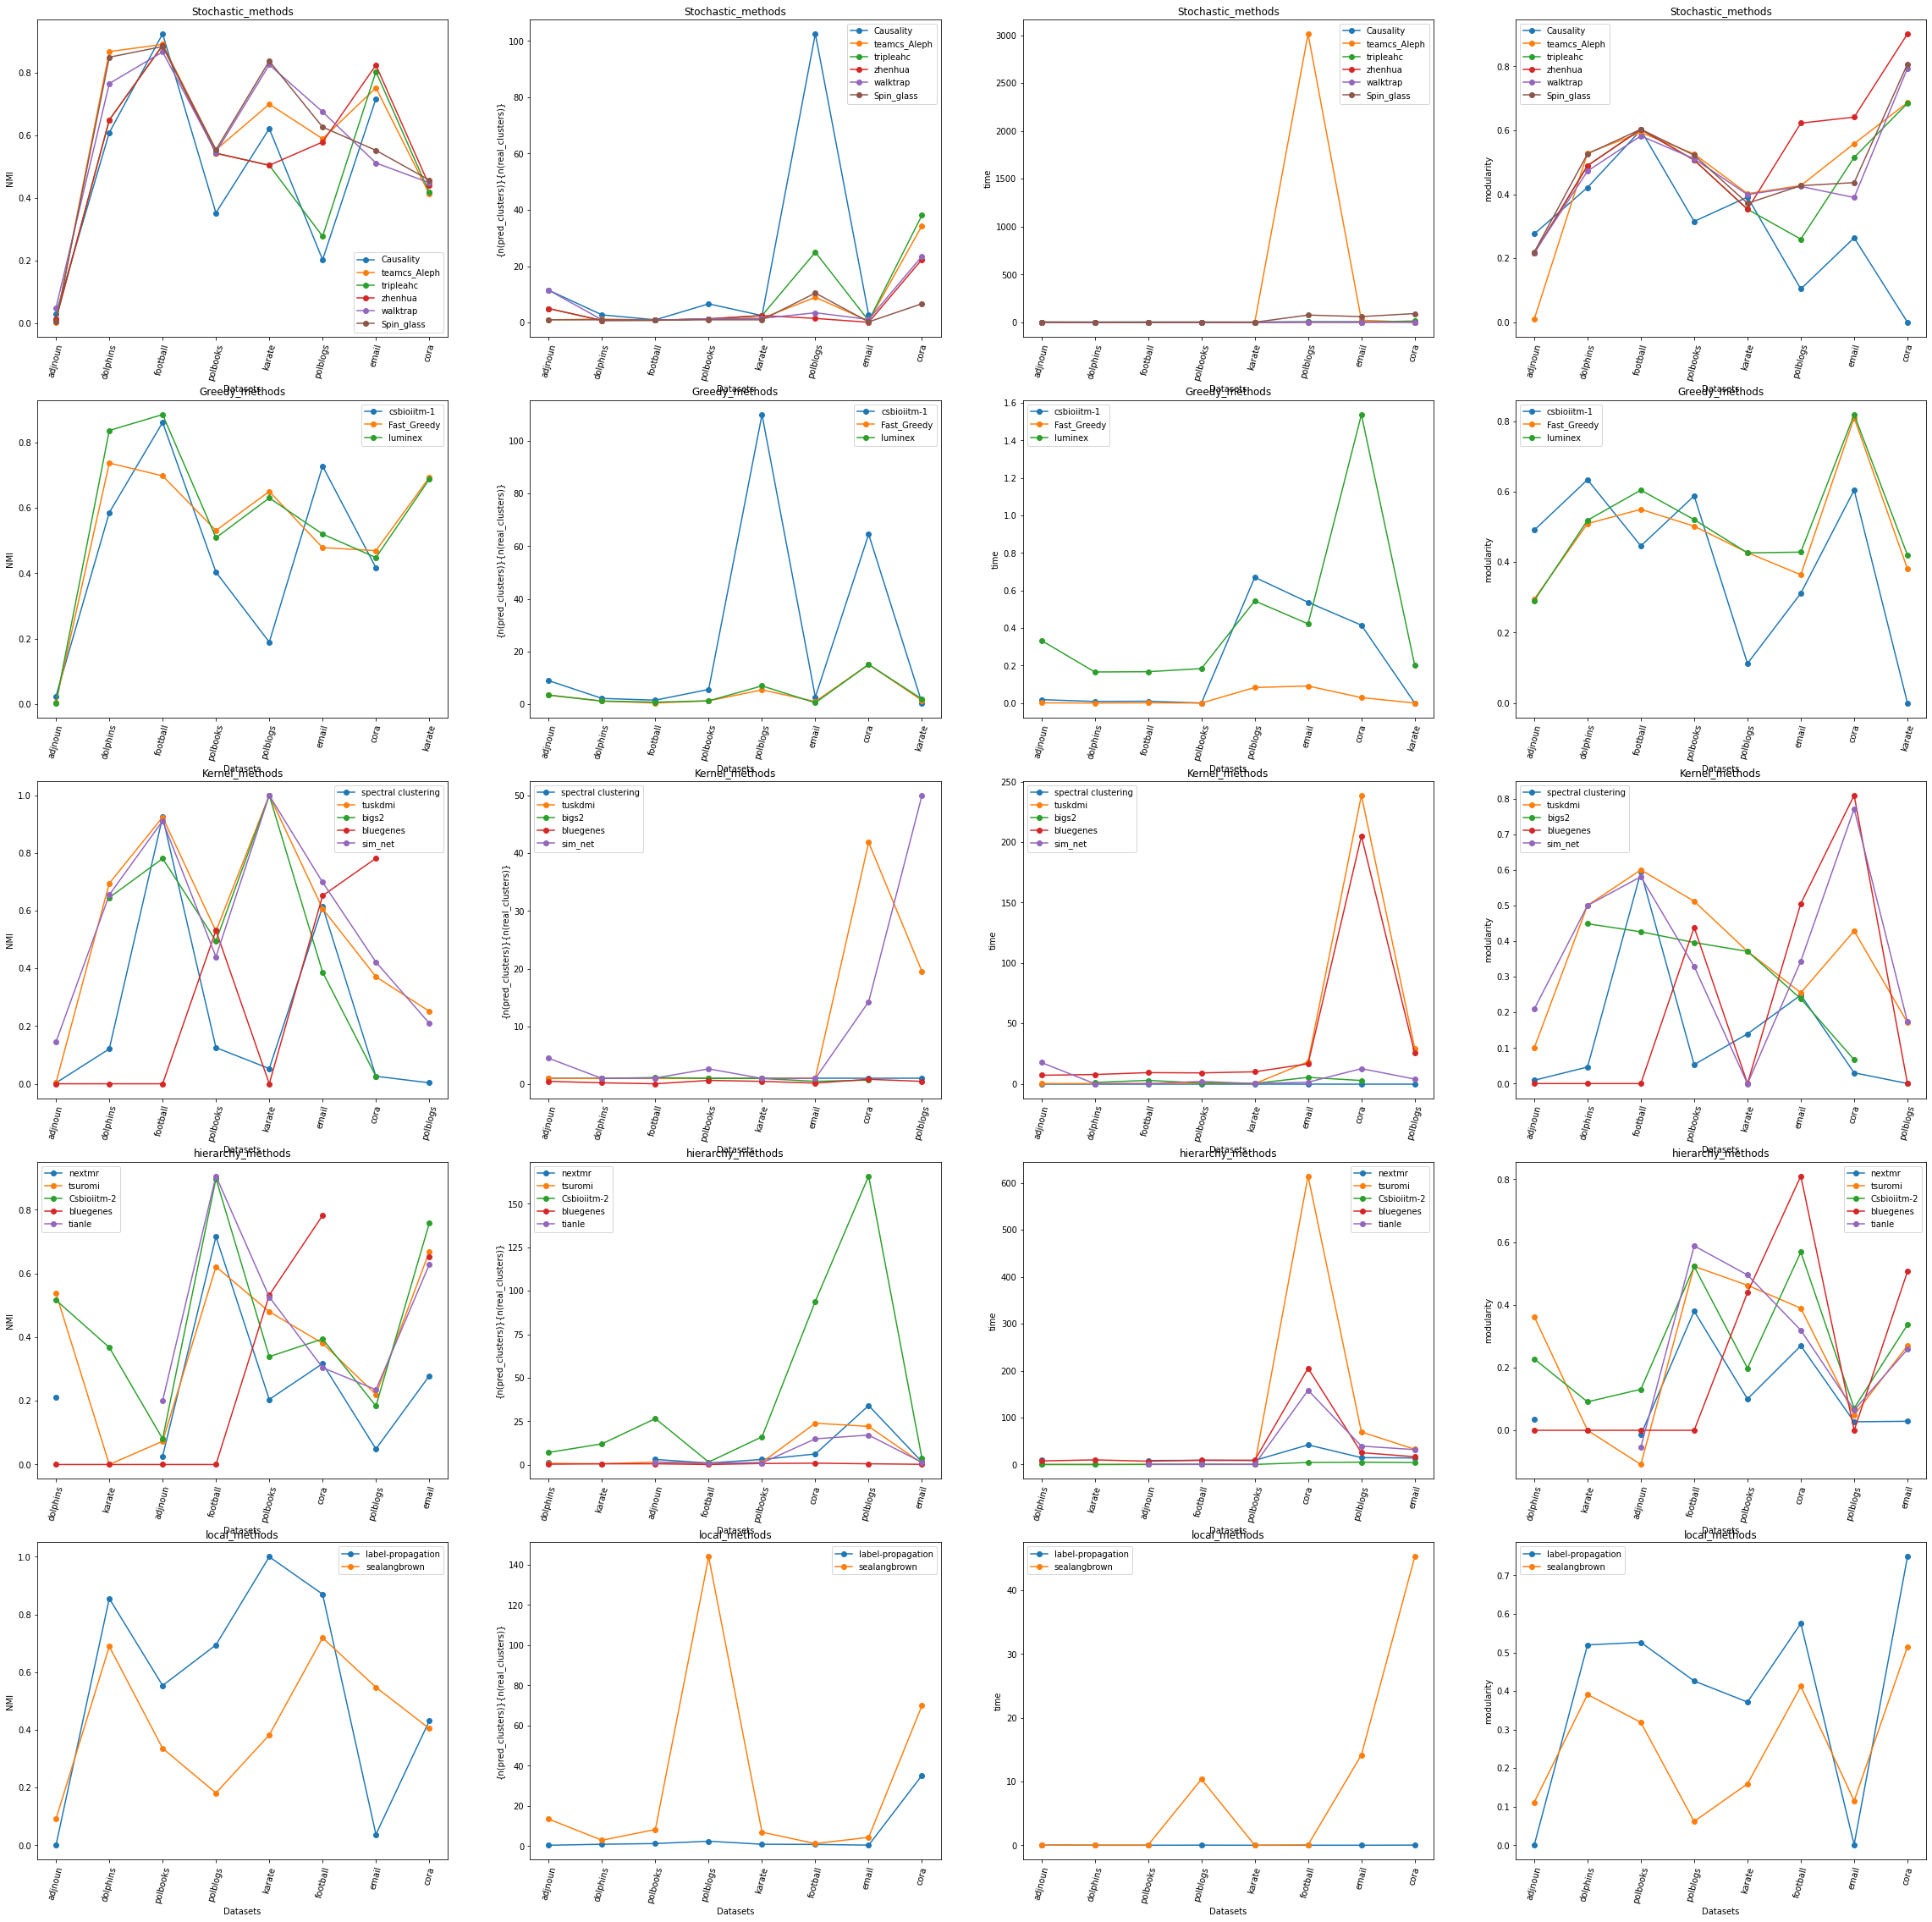

In [23]:
fig,axs=plt.subplots(5,4,figsize=(40,40))
k=0
for i in range(5):
    for j in range(4):
        visualise(df[j],titles[i],metrics[j],methods[i],axs[i][j],order=orders[i])
        k+=1

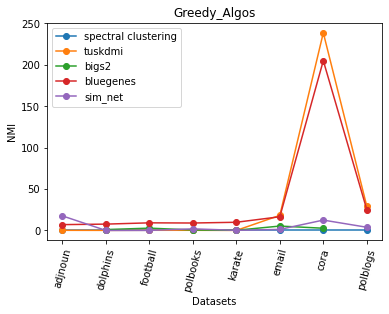

In [11]:
fig,axs=plt.subplots()
visualise(df_3,'Greedy_Algos','NMI',kernel_algos,axs,order=order3)

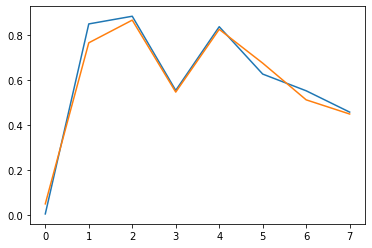

In [12]:
order=[0,1,2,3,5,4,6,7]
index_order = list(range(len(df_1)))  # Get current order of indices
index_order[4], index_order[5] = index_order[5], index_order[4]  # Swap the 5th and 6th indices
df = df_1.reindex(index_order).reset_index(drop=True)
plt.plot(range(8),df_1['Spin_glass'].iloc[order])
plt.plot(range(8),df_1['walktrap'].iloc[order])